<a href="https://colab.research.google.com/github/plaban1981/Dphi_hackathon/blob/main/Predict_if_the_applicant_should_be_granted_a_loan_or_not.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [98]:
loan_data  = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/Loan_Data/loan_train.csv" )

In [99]:
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/Loan_Data/loan_test.csv')

In [100]:
loan_data.head()

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,LP002305,Female,No,0,Graduate,No,4547,0.0,115.0,360.0,1.0,Semiurban,1
1,1,LP001715,Male,Yes,3+,Not Graduate,Yes,5703,0.0,130.0,360.0,1.0,Rural,1
2,2,LP002086,Female,Yes,0,Graduate,No,4333,2451.0,110.0,360.0,1.0,Urban,0
3,3,LP001136,Male,Yes,0,Not Graduate,Yes,4695,0.0,96.0,NaN,1.0,Urban,1
4,4,LP002529,Male,Yes,2,Graduate,No,6700,1750.0,230.0,300.0,1.0,Semiurban,1


In [7]:
loan_data = loan_data.drop("Unnamed: 0",axis=1)

In [101]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001116,Male,No,0,Not Graduate,No,3748,1668.0,110.0,360.0,1.0,Semiurban
1,LP001488,Male,Yes,3+,Graduate,No,4000,7750.0,290.0,360.0,1.0,Semiurban
2,LP002138,Male,Yes,0,Graduate,No,2625,6250.0,187.0,360.0,1.0,Rural
3,LP002284,Male,No,0,Not Graduate,No,3902,1666.0,109.0,360.0,1.0,Rural
4,LP002328,Male,Yes,0,Not Graduate,No,6096,0.0,218.0,360.0,0.0,Rural


In [10]:
loan_data.describe(include='all')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,491,481,490,482,491,462,491.000000,491.000000,475.000000,478.000000,448.000000,491,491.000000
unique,491,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,NaN
top,LP001778,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,NaN
freq,1,393,324,276,388,398,NaN,NaN,NaN,NaN,NaN,186,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,5401.189409,1589.730998,145.014737,341.297071,0.848214,NaN,0.698574
std,NaN,NaN,NaN,NaN,NaN,NaN,6419.427177,2919.320624,86.310534,66.964051,0.359214,NaN,0.459345
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,17.000000,12.000000,0.000000,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,2923.500000,0.000000,100.000000,360.000000,1.000000,NaN,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,3865.000000,1229.000000,126.000000,360.000000,1.000000,NaN,1.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,5705.500000,2251.500000,162.000000,360.000000,1.000000,NaN,1.000000


In [22]:
loan_data.isnull().sum()[loan_data.isnull().sum() > 0] / len(loan_data)

Gender              0.020367
Married             0.002037
Dependents          0.018330
Self_Employed       0.059063
LoanAmount          0.032587
Loan_Amount_Term    0.026477
Credit_History      0.087576
dtype: float64

In [102]:
null_cols = loan_data.isnull().sum()[loan_data.isnull().sum() > 0].index.tolist()

In [103]:
null_cols

['Gender',
 'Married',
 'Dependents',
 'Self_Employed',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [104]:
cat_cols = [ col for col in loan_data.columns if loan_data[col].dtypes == 'O' ]
num_cols = [ col for col in loan_data.columns if loan_data[col].dtypes != 'O' ]

In [105]:
cat_cols

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

In [112]:
loan_data['Gender'].mode()[0]

'Male'

**Impute Categorical Values**

In [113]:
for i in null_cols:
  if i in cat_cols:
    loan_data[i] = loan_data[i].fillna(loan_data[i].mode()[0])

**Impute Numerical Values**

In [116]:
for i in null_cols:
  if i in num_cols:
    loan_data[i] = loan_data[i].fillna(loan_data[i].median())

In [117]:
loan_data.isnull().sum()[loan_data.isnull().sum() > 0] / len(loan_data)

Series([], dtype: float64)

In [19]:
num_cols

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Loan_Status']

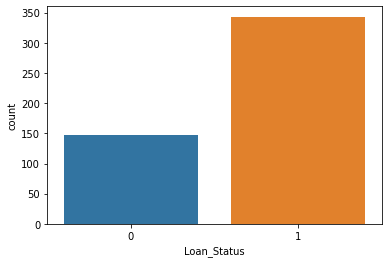

In [118]:
sns.countplot(x='Loan_Status',data=loan_data)

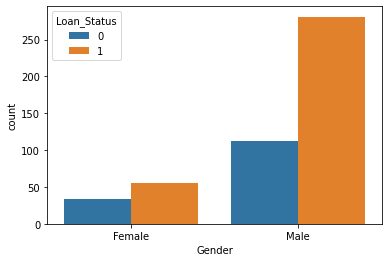

In [20]:
sns.countplot(x='Gender',data=loan_data,hue='Loan_Status')

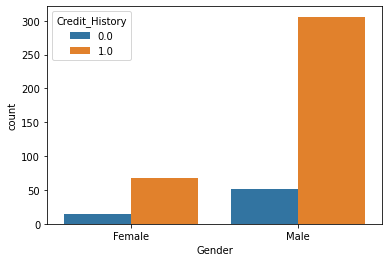

In [30]:
sns.countplot(x='Gender',data=loan_data,hue='Credit_History')

In [25]:
loan_data_na = loan_data.dropna()

In [26]:
loan_data_na.shape

(381, 13)

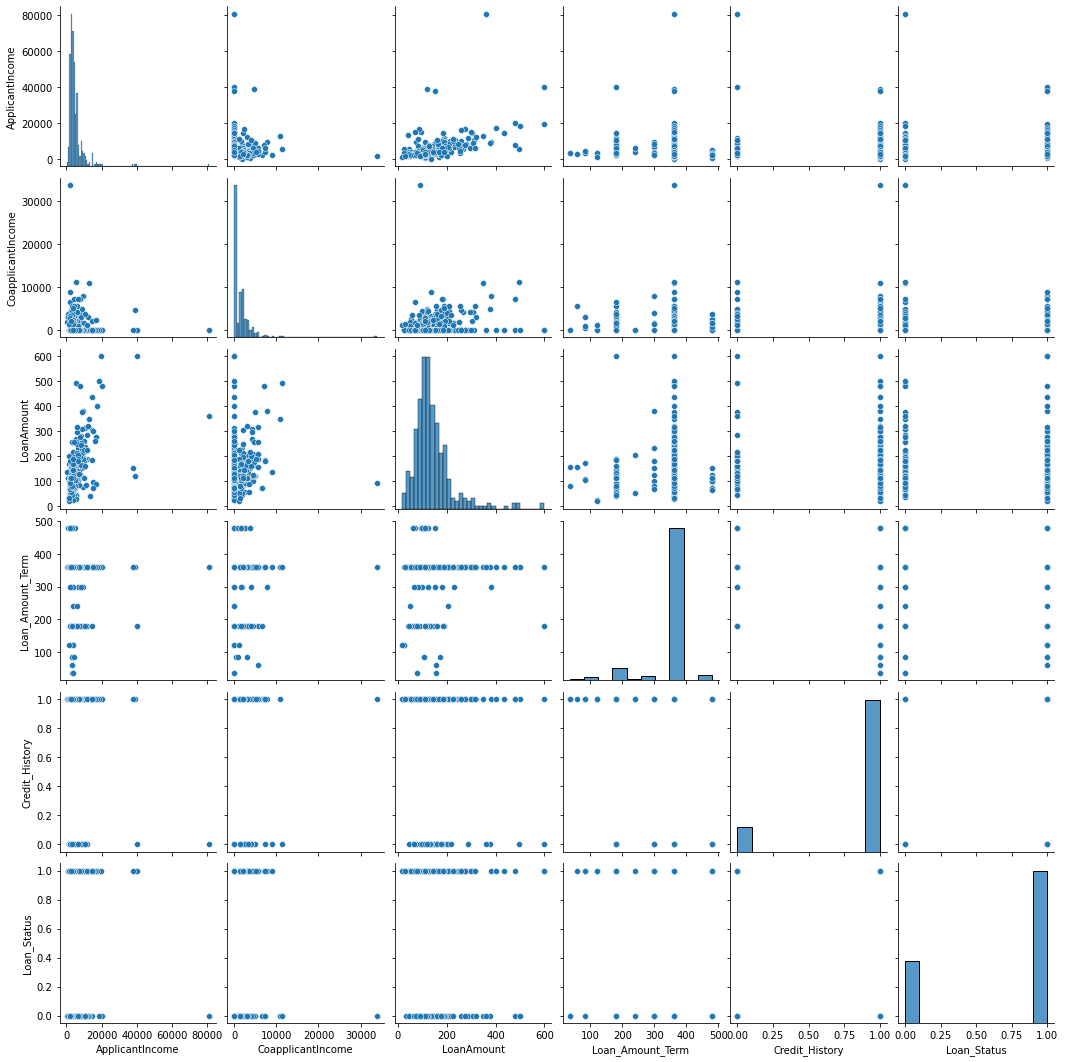

In [33]:
sns.pairplot(loan_data_na)

In [35]:
for cols in cat_cols:
  print(loan_data_na[cols].value_counts(normalize=True))
  print("*"*80)

LP001778    0.002625
LP002051    0.002625
LP002082    0.002625
LP002776    0.002625
LP001164    0.002625
              ...   
LP002266    0.002625
LP001507    0.002625
LP001543    0.002625
LP001439    0.002625
LP001518    0.002625
Name: Loan_ID, Length: 381, dtype: float64
********************************************************************************
Male      0.816273
Female    0.183727
Name: Gender, dtype: float64
********************************************************************************
Yes    0.658793
No     0.341207
Name: Married, dtype: float64
********************************************************************************
0     0.559055
1     0.175853
2     0.173228
3+    0.091864
Name: Dependents, dtype: float64
********************************************************************************
Graduate        0.805774
Not Graduate    0.194226
Name: Education, dtype: float64
********************************************************************************
No     0.860892
Y

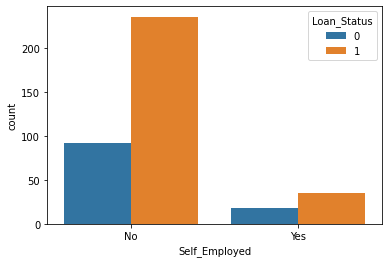

In [36]:
sns.countplot(x='Self_Employed',data=loan_data_na,hue='Loan_Status')

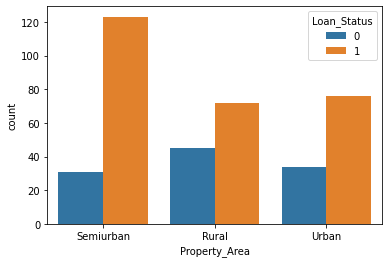

In [37]:
sns.countplot(x='Property_Area',data=loan_data_na,hue='Loan_Status')

In [120]:
loan_data = loan_data.drop('Loan_ID',axis=1)

**Features and Labels**

In [121]:
X = loan_data.drop('Loan_Status',axis=1)
Y = loan_data['Loan_Status']


In [122]:
x = X.copy()

In [123]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
x['Gender'] = lb.fit_transform(x['Gender'])

In [124]:
for col in x.columns:
  if x[col].dtypes =='O':
    x[col] = lb.fit_transform(x[col])

In [125]:
x.head()

,Unnamed: 0,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,0,0,1,0,0,4547,0.0,115.0,360.0,1.0,0
1,1,1,1,0,1,1,5703,0.0,130.0,360.0,1.0,1
2,2,0,1,1,0,0,4333,2451.0,110.0,360.0,1.0,0
3,3,1,1,1,1,1,4695,0.0,96.0,360.0,1.0,0
4,4,1,1,0,0,0,6700,1750.0,230.0,300.0,1.0,0


In [137]:
x = x.drop("Unnamed: 0",axis=1)

In [138]:
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,0,1,0,0,4547,0.0,115.0,360.0,1.0,0
1,1,1,0,1,1,5703,0.0,130.0,360.0,1.0,1
2,0,1,1,0,0,4333,2451.0,110.0,360.0,1.0,0
3,1,1,1,1,1,4695,0.0,96.0,360.0,1.0,0
4,1,1,0,0,0,6700,1750.0,230.0,300.0,1.0,0


In [139]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,Y,test_size=0.2,stratify=Y,random_state=42)

**TPOT classifier**

In [43]:
!pip install tpot

     |████████████████████████████████| 92kB 3.8MB/s 
     |████████████████████████████████| 163kB 18.2MB/s 
     |████████████████████████████████| 157.5MB 62kB/s 
  Created wheel for stopit: filename=stopit-1.1.2-cp36-none-any.whl size=11957 sha256=c50364b75aacd557661e93b5628543cc02dbae1ee2bcf741952d6f3aa46fba25
  Stored in directory: /root/.cache/pip/wheels/3c/85/2b/2580190404636bfc63e8de3dff629c03bb795021e1983a6cc7
Successfully built stopit
  Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


In [127]:
from tpot import TPOTClassifier
from sklearn.metrics import f1_score,accuracy_score,confusion_matrix

In [140]:
tpot = TPOTClassifier(verbosity=3, 
                      scoring="f1", 
                      random_state=23, 
                      periodic_checkpoint_folder="tpot_loan.txt", 
                      n_jobs=-1, 
                      generations=10, 
                      population_size=100)

In [141]:
tpot.fit(X_train, y_train)
print("Accuracy is {}%".format(tpot.score(X_test, y_test)*100))

32 operators have been imported by TPOT.


_pre_test decorator: _random_mutation_operator: num_test=0 Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty..
_pre_test decorator: _random_mutation_operator: num_test=0 Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty..
_pre_test decorator: _random_mutation_operator: num_test=0 feature_names mismatch: ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area'] ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10']
expected LoanAmount, Dependents, Married, Credit_History, Loan_Amount_Term, Education, Self_Employed, CoapplicantIncome, Property_Area, Gender, ApplicantIncome in input data
training data did not have the following fields: f7, f8, f1, f6, f9, f10, f4, f5, f2, f3, f0.
_pre_test decorator: _random_mutation_operator: num_test=0 Solver lbfgs supports only dual=False, got dual=True.
_pre_test decorator: _random_mutati

In [142]:
tpot.export('tpot_exported_pipeline.py')

In [143]:
y_pred = tpot.predict(X_test)

In [144]:
f1_score(y_pred,y_test)

0.8918918918918919

**Predictions**

In [145]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001116,Male,No,0,Not Graduate,No,3748,1668.0,110.0,360.0,1.0,Semiurban
1,LP001488,Male,Yes,3+,Graduate,No,4000,7750.0,290.0,360.0,1.0,Semiurban
2,LP002138,Male,Yes,0,Graduate,No,2625,6250.0,187.0,360.0,1.0,Rural
3,LP002284,Male,No,0,Not Graduate,No,3902,1666.0,109.0,360.0,1.0,Rural
4,LP002328,Male,Yes,0,Not Graduate,No,6096,0.0,218.0,360.0,0.0,Rural


In [146]:
x.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [147]:
test = test_data[x.columns]

In [148]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             120 non-null    object 
 1   Married            121 non-null    object 
 2   Dependents         117 non-null    object 
 3   Education          123 non-null    object 
 4   Self_Employed      120 non-null    object 
 5   ApplicantIncome    123 non-null    int64  
 6   CoapplicantIncome  123 non-null    float64
 7   LoanAmount         117 non-null    float64
 8   Loan_Amount_Term   122 non-null    float64
 9   Credit_History     116 non-null    float64
 10  Property_Area      123 non-null    object 
dtypes: float64(4), int64(1), object(6)
memory usage: 10.7+ KB


In [149]:
test.isnull().sum()[test.isnull().sum() > 0]

Gender              3
Married             2
Dependents          6
Self_Employed       3
LoanAmount          6
Loan_Amount_Term    1
Credit_History      7
dtype: int64

In [150]:
for i in null_cols:
  if i in cat_cols:
    test[i] = test[i].fillna(test[i].mode()[0])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [151]:
for i in null_cols:
  if i in num_cols:
    test[i] = test[i].fillna(test[i].median())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [152]:
test.shape

(123, 11)

In [153]:
for col in x.columns:
  if test[col].dtypes =='O':
    print(col)
    test[col] = lb.fit_transform(test[col])

Gender
Married
Dependents
Education
Self_Employed
Property_Area


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

In [154]:
preds = tpot.predict(test)

In [155]:
len(preds)

123

In [156]:
sub = pd.DataFrame(preds,columns=['prediction'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


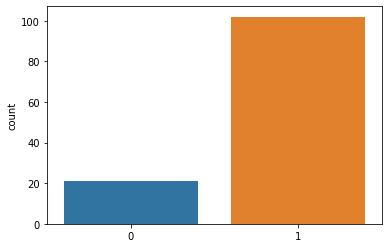

In [157]:
sns.countplot(preds)

In [158]:
sub.to_csv("tpot.csv",index=False)